In [197]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

__Agenda__

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Pros and cons of logistic regression

**Classification techniques** are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification algorithms that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable. For example, IRIS dataset a very famous example of multi-class classification. Other examples are classifying article/blog/document category.

**Logistic Regression** is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used for comparison for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

## Predicting a Categorical Response

[Data Source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


In [188]:
# Breast Cancer identification dataset
import pandas as pd

df = pd.read_csv('resources/breast_cancer.csv')

df.drop(columns= ['Unnamed: 32'], inplace = True)


In [189]:
df['Target'] = df.diagnosis.map(lambda x: 1 if x == 'M' else 0)

__Your Turn__

- Use 'area_mean' as the independent variable and 'Target' as dependent variable and apply a linear regression model to this dataset.
- Plot the resulting regression line.

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [194]:
#%load -r 1-5 supplement.py

## Interpreting linear regression coefficients


__Your Turn__ 

- According to the linear regression model, that would be your prediction if area_mean = 350?

- What about if 'area_mean' is 5?

In [210]:
#%load -r 8-11 supplement.py

__Your Turn__

Now let's make our prediction more suitable for categorical variables.

- First find the predictions using predict method
- Now find a way to map each prediction to either 0 or 1.

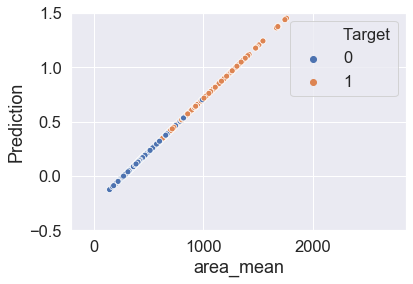

In [235]:
df['Prediction'] = linreg.predict(df.area_mean.values.reshape(-1,1))
x = 'area_mean'
sns.scatterplot(x=x, y='Prediction', hue= 'Target', data=df, ci=None)
plt.ylim([-0.5, 1.5])
plt.xlim([df[x].min()- df[x].std(), df[x].max() + df[x].std()])
plt.show()

Make a prediction depending on our observation above


In [249]:
# %load -r 13 supplement.py
df['Pred_class'] = df.Prediction.map(lambda x: 1 if x> 0.4 else 0 )

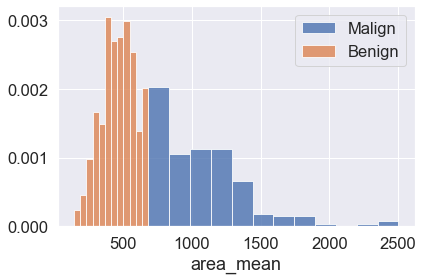

In [250]:
sns.distplot(df[df.Pred_class == 1].area_mean,norm_hist=True, label = 'Malign', hist_kws = {'alpha': 0.8}, kde = False)
sns.distplot(df[df.Pred_class== 0].area_mean, norm_hist= True, label = 'Benign', hist_kws = {'alpha': 0.8}, kde = False)

plt.legend()
plt.tight_layout()

If **area_mean= 750**, what class do we predict for household? 

If **area_mean=1500**, what class do we predict for household?

We predict the 0 class for **lower** values of __area_mean__, and the 1 class for **higher** values of it. What's our cutoff value? Around **area_mean=750**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **Prediction >= 0.4**, we predict a class of **1**, else we predict a class of **0**.

In [251]:
# Take a look at our predictions
df.sample(15)[['Prediction', 'Target', 'Pred_class']]

,Prediction,Target,Pred_class
546,0.050869,0,0
300,0.920600,1,1
269,0.070367,0,0
176,0.028933,0,0
66,-0.003240,0,0
37,0.244781,0,0
392,0.460142,1,1
403,0.228988,0,0
215,0.298500,1,0
435,0.318583,1,0


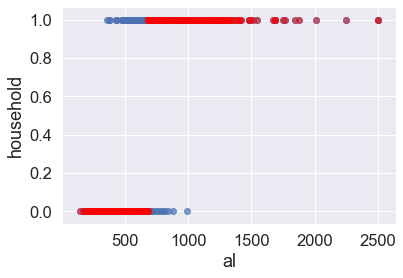

In [252]:
# plot the class predictions
plt.scatter(df.area_mean, df.Target, alpha = 0.7)
plt.scatter(df.area_mean, df.Pred_class, color='red', alpha = 0.4)
plt.xlabel('al')
plt.ylabel('household')

plt.show()

## Using Logistic Regression Instead

Let's use LogisticRegression from sklearn.linear_model to compare the classifications.

[sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [271]:
# %load -r 15-23 supplement.py


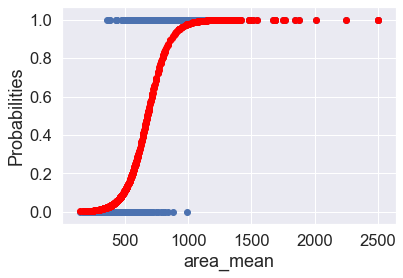

In [272]:
# plot the class predictions
plt.scatter(df.area_mean, df.Target)
plt.scatter(df.area_mean, df.Log_probabilities, color='red')
plt.xlabel('area_mean')
plt.ylabel('Probabilities')
plt.show()

__Your Turn__

Use the trained logistic regression and make predictions for 

- area_mean = 350

- area_mean = 5

In [276]:
df.sample(20)[['Target', 'Pred_class', 'Log_Prediction']]

,Target,Pred_class,Log_Prediction
204,0,0,0
197,1,1,1
497,0,0,0
373,1,1,1
287,0,0,0
191,0,0,0
275,0,0,0
421,0,0,0
136,0,0,0
137,0,0,0


__Your Turn__

- How many of the predictions are different between two models?

In [ ]:
# %load -r 25 supplement.py
(df.Pred_class != df.Log_Prediction).sum()

Note that when we call logreg_predict_proba we get an array of shape (n_samples, n_class). The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

__Your Turn__

- Write a function that converts probabilities to odds

- Write a function that converts a given odd to its probability.


## Properties of log and exponential functions

What is **e**? 


In [288]:
math.e

2.718281828459045

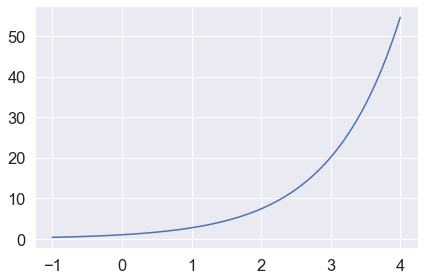

In [290]:
## exponential map with base e
y = np.logspace(-1,4, 100, base = math.e)

x = np.log(y)

plt.plot(x,y)

plt.tight_layout()

__Your Turn__

- Find $e^{-10}$, $e^{3}$

__Logarithm Function__

[Logarithm Wikipedia](https://en.wikipedia.org/wiki/Logarithm)

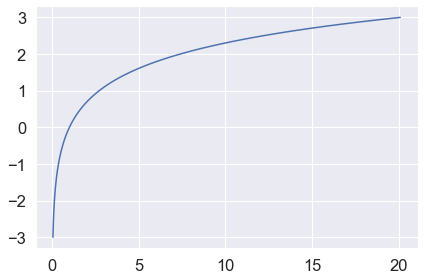

In [303]:
x = np.logspace(-3, 3, base = math.e, num=100)
y = np.log(x)
plt.plot(x,y)
plt.tight_layout()

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [306]:
# time needed to grow 1 unit to e units
np.log(math.e)

1.0

## Logistic Regression: under the hood?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p_{i}\over 1-p_{i}}\right) = \beta_0 + \beta_1x_{i}$$

This is called the **logit function**.



The equation can be rearranged into the **logistic function**:

$$p(x_{i}) = \frac{e^{\beta_0 + \beta_1x_{i}}} {1 + e^{\beta_0 + \beta_1x_{i}}}$$



In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1
- We will maximize likelihood function $$ \ell(\beta_{0}, \beta_{1}) = \prod_{i: y_1 =1} p(x_i)\prod_{i^{\prime}: y_{i^{\prime}}=0} (1- p(x_{i}))$$ 

to find $\beta_{0}$ and $\beta_{1}$


[Least squares vs ML](https://stats.stackexchange.com/questions/143705/maximum-likelihood-method-vs-least-squares-method)

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

__Your Turn__

- Use logistic regression to get probability predictions

- Then use map method to find corresponding odds.

## Interpreting Logistic Regression Coefficients

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

<img src='resources/logistic_betas.png' width=700/>

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 8: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions

## Logistic regression on the whole dataset

__Your Turn__

Try to run logistic regression on the whole dataset. Return the prediction accuracy.